<a href="https://colab.research.google.com/github/jburchfield76/datasharing/blob/master/Insurance_Risk_Confusion_Matrix.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Evaluating predictions against Risk-actual...
Evaluation Metrics:
low Risk: Precision=0.50, Recall=1.00, F1 Score=0.67
medium Risk: Precision=0.44, Recall=0.68, F1 Score=0.54
high Risk: Precision=0.57, Recall=0.17, F1 Score=0.27


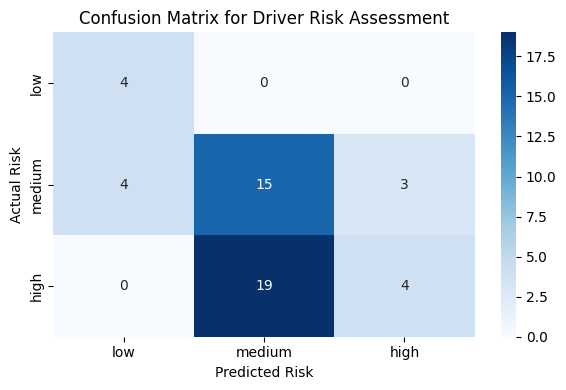

Results saved to 'C:\Users\thest\OneDrive\Desktop\ML Plan\Insurance-Risk-Confusion-Matrix_Predictions.xlsx'


In [3]:
import pandas as pd
import numpy as np
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Read the Excel file

data = pd.read_excel('Insurance-C-Matrix-Risk-pred-vs-actual.xlsx')

# Step 2: Define feature columns
feature_columns = ['age', 'tickets', 'claims']
X = data[feature_columns]

# Step 3: Check for missing values
if X.isnull().sum().sum() > 0:
    print("Warning: Missing values detected. Filling with median...")
    X = X.fillna(X.median())

# Step 4: Calculate Risk-pred (rule-based)
def calculate_risk_pred(row):
    points = 0
    # Age
    if row['age'] < 25:
        points += 2
    elif row['age'] <= 40:
        points += 1
    # Tickets
    if row['tickets'] >= 2:
        points += 2
    elif row['tickets'] == 1:
        points += 1
    # Claims
    if row['claims'] >= 2:
        points += 2
    elif row['claims'] == 1:
        points += 1
    # Map points to risk
    if points <= 2:
        return 'low'
    elif points <= 4:
        return 'medium'
    else:
        return 'high'

# Apply rule-based prediction
data['Risk-pred'] = X.apply(calculate_risk_pred, axis=1)

# Step 5: Check if Risk-actual is filled
labels = ['low', 'medium', 'high']
if data['Risk-actual'].notnull().any():
    print("Evaluating predictions against Risk-actual...")
    # Map labels to numbers for metrics
    risk_mapping = {'low': 0, 'medium': 1, 'high': 2}
    y_true = data['Risk-actual'].map(risk_mapping)
    y_pred = data['Risk-pred'].map(risk_mapping)

    # Calculate metrics
    precision = precision_score(y_true, y_pred, average=None)
    recall = recall_score(y_true, y_pred, average=None)
    f1 = f1_score(y_true, y_pred, average=None)

    # Print metrics
    print("Evaluation Metrics:")
    for i, (p, r, f) in enumerate(zip(precision, recall, f1)):
        print(f"{labels[i]} Risk: Precision={p:.2f}, Recall={r:.2f}, F1 Score={f:.2f}")

    # Confusion Matrix
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
                xticklabels=labels, yticklabels=labels)
    plt.xlabel("Predicted Risk")
    plt.ylabel("Actual Risk")
    plt.title("Confusion Matrix for Driver Risk Assessment")
    plt.tight_layout()
    plt.show()
else:
    print("Risk-actual is empty. Fill it to evaluate predictions.")

# Step 6: Save results
output_file = r'C:\Users\thest\OneDrive\Desktop\ML Plan\Insurance-Risk-Confusion-Matrix_Predictions.xlsx'
data.to_excel(output_file, index=False)
print(f"Results saved to '{output_file}'")